<a href="https://www.kaggle.com/code/tipatle/utkfacesimplemodel?scriptVersionId=126405563" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.rRead_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/utkface_aligned_cropped/crop_part1/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/26_0_2_20170104023102422.jpg.chip.jpg


In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator

In [4]:
folder_path="/kaggle/input/utkface-new/UTKFace"
age=[]
gender=[]
img_path=[]
for file in os.listdir(folder_path):
  age.append(int(file.split('_')[0]))
  gender.append(int(file.split('_')[1]))
  img_path.append(file)

In [5]:
df1 = pd.DataFrame({'age':age,'img':img_path})
df2 = pd.DataFrame({'gender':gender,'img':img_path})

In [6]:
df1.head()

,age,img
0,26,26_0_2_20170104023102422.jpg.chip.jpg
1,22,22_1_1_20170112233644761.jpg.chip.jpg
2,21,21_1_3_20170105003215901.jpg.chip.jpg
3,28,28_0_0_20170117180555824.jpg.chip.jpg
4,17,17_1_4_20170103222931966.jpg.chip.jpg


In [7]:
df2.head()

,gender,img
0,0,26_0_2_20170104023102422.jpg.chip.jpg
1,1,22_1_1_20170112233644761.jpg.chip.jpg
2,1,21_1_3_20170105003215901.jpg.chip.jpg
3,0,28_0_0_20170117180555824.jpg.chip.jpg
4,1,17_1_4_20170103222931966.jpg.chip.jpg


In [79]:
train_df1 = df1.sample(frac=1,random_state=0).iloc[:20000]
test_df1 = df1.sample(frac=1,random_state=0).iloc[20000:]
train_df2 = df2.sample(frac=1,random_state=0).iloc[:20000]
test_df2 = df2.sample(frac=1,random_state=0).iloc[20000:]

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator1 = train_datagen.flow_from_dataframe(train_df1,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age'],
                                                    target_size=(256,256),
                                                    batch_size = 32,
                                                    class_mode='multi_output')

test_generator1 = test_datagen.flow_from_dataframe(test_df1,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['age'],
                                                    batch_size = 32,
                                                    target_size=(256,256),
                                                  class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [ ]:
x_batch, y_batch = next(train_generator)

# Inspect the shape of the input data
print('Input shape:', x_batch.shape)

In [10]:
from keras.layers import *
from keras.models import Model
import keras
import keras_tuner 

In [11]:
# def build_model(hp):
    
#     layers = hp.Int(f"layers", min_value=2, max_value=6, step=1)
#     input = keras.Input(shape=(256, 256, 3))
#     initializer = hp.Choice('initializer', ['glorot_uniform', 'glorot_normal'])
#     model = input
    
#     for i in range(layers):
#         pool = hp.Choice(f'maxpool{i+1}', ['none', 'globalmaxpool', 'maxpool', 'avgpool'])
        
#         if(initializer=='glorot_uniform'):
#             model = Conv2D(hp.Int(f"units{i+1}", min_value=4, max_value=512, step=8),
#                        (3, 3), 
#                        padding='same', 
#                        activation='relu', 
#                        kernel_initializer=keras.initializers.GlorotUniform(seed=42))(model)
#         elif(initializer=='glorot_normal'):
#             model = Conv2D(hp.Int(f"units{i+1}", min_value=4, max_value=512, step=8),
#                        (3, 3), 
#                        padding='same', 
#                        activation='relu', 
#                        kernel_initializer=keras.initializers.GlorotNormal(seed=42))(model)
            
#         if(pool=='maxpool'): 
#             model = MaxPool2D((2, 2), 
#                           strides=hp.Int(f'stride{i+1}', min_value=1, max_value=2),
#                           padding=hp.Choice(f'padding{i+1}', ['valid', 'same']))(model)
#         elif(pool=='avgpool'):
#             model = AveragePooling2D((2, 2), 
#                           strides=hp.Int(f'stride{i+1}', min_value=1, max_value=2),
#                           padding=hp.Choice(f'padding{i+1}', ['valid', 'same']))(model)
#         elif(pool=='globalmaxpool'):
#             model = GlobalMaxPool2D(
#                 keepdims=hp.Choice(f'keep_dims{i+1}', [True, False]))(model)
            
#         model = Dropout(
#                 rate=hp.Choice(f'rate{i+1}', [0.0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5 ]),
#                 seed=42)(model)
            
#         model = LayerNormalization(axis=-1)(model)
        
#     model = Flatten()(model)
#     output1 = hp.Int(f"output1", min_value=1, max_value=8, step=1)
#     output2 = hp.Int(f"output2", min_value=1, max_value=8, step=1)
#     for i in range(output1):
#         if(i!=0):
#             dense1 = Dense(hp.Int(f"d1units{i+1}", min_value=1, max_value=512, step=8),
#                            activation='relu')(dense1)
#         else:
#             dense1 = Dense(hp.Int(f"d1units{i+1}", min_value=1, max_value=512, step=8),
#                            activation='relu')(model)
#         dense1 = Dropout(
#             rate=hp.Choice(f'd1rate{i+1}', [0.0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5 ]), seed=42)(dense1)
        
#     for i in range(output2):
#         if(i!=0):
#             dense2 = Dense(hp.Int(f"d2units{i+1}", min_value=1, max_value=512, step=8),
#                            activation='relu')(dense2)
#         else:
#             dense2 = Dense(hp.Int(f"d2units{i+1}", min_value=1, max_value=512, step=8),
#                            activation='relu')(model)
#         dense2 = Dropout(
#             rate=hp.Choice(f'd2rate{i+1}', [0.0, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5 ]), seed=42)(dense2)
    
#     o1 = Dense(1, activation='linear')(dense1)
#     o2 = Dense(1, activation='sigmoid')(dense2)
#     Model = keras.Model(inputs=input, outputs=[o1, o2], name="UTKFaceModel")
#     losses = [[tf.keras.losses.MeanSquaredError()], [tf.keras.losses.BinaryCrossentropy()]]
#     metrics = [[tf.keras.metrics.MeanAbsoluteError()], [tf.keras.metrics.BinaryAccuracy()]]
#     lr = hp.Float("lr", min_value=1e-4, max_value=1e-2)                  
#     optimizer = hp.Choice('optimizer', ['adam', 'rmsprop'])
#     if optimizer=='adam':
#         Model.compile(
#             optimizer=keras.optimizers.Adam(learning_rate=lr),
#             loss=losses,
#             loss_weights=[1.0, 1.0],
#             metrics=metrics
#         )
#     elif optimizer=='rmsprop':
#         Model.compile(
#             optimizer=keras.optimizers.RMSprop(learning_rate=lr),
#             loss=losses,
#             loss_weights=[1.0, 1.0],
#             metrics=metrics
#         )
#     return Model

In [33]:
def build_1_model(hp):
    
    layers = hp.Int(f"layers", min_value=2, max_value=6, step=1)
    input = keras.Input(shape=(256, 256, 3))
    initializer = hp.Choice('initializer', ['glorot_uniform', 'glorot_normal'])
    pool = hp.Choice(f'maxpool', ['none', 'globalmaxpool', 'globalavgpool', 'maxpool', 'avgpool'])
    model = input
    
    for i in range(layers):
        
        if(initializer=='glorot_uniform'):
            model = Conv2D(hp.Int(f"units{i+1}", min_value=4, max_value=512, step=8),
                       (3, 3), 
                       padding='same', 
                       activation='relu', 
                       kernel_initializer=keras.initializers.GlorotUniform(seed=42))(model)
        elif(initializer=='glorot_normal'):
            model = Conv2D(hp.Int(f"units{i+1}", min_value=4, max_value=512, step=8),
                       (3, 3), 
                       padding='same', 
                       activation='relu', 
                       kernel_initializer=keras.initializers.GlorotNormal(seed=42))(model)
            
        if(pool=='maxpool'): 
            model = MaxPool2D((2, 2), 
                          strides=2,
                          padding=hp.Choice(f'padding{i+1}', ['valid', 'same']))(model)
        elif(pool=='avgpool'):
            model = AveragePooling2D((2, 2), 
                          strides=2,
                          padding=hp.Choice(f'padding{i+1}', ['valid', 'same']))(model)
        elif(pool=='globalavgpool'):
            model = GlobalAveragePooling2D(
                    keepdims=True)(model)
        elif(pool=='globalmaxpool'):
            model = GlobalMaxPool2D(
                keepdims=True)(model)
            
        model = Dropout(rate=hp.Choice(f'rate{i+1}', [0.01, 0.1, 0.2, 0.3, 0.4, 0.5 ]), seed=42)(model)
        model = LayerNormalization(axis=-1)(model)
        
    model = Flatten()(model)
    dense1 = model
    output1 = hp.Int(f"output1", min_value=1, max_value=8, step=1)
    for i in range(output1):
        dense1 = Dense(hp.Int(f"d1units{i+1}", min_value=1, max_value=64, step=4),
                           activation='relu')(dense1)
        dense1 = Dropout(
            rate=hp.Choice(f'd1rate{i+1}', [0.01, 0.1, 0.2, 0.3, 0.4, 0.5 ]), seed=42)(dense1)
        
    o1 = Dense(1, activation='linear')(dense1)
    
    Model1 = keras.Model(inputs=input, outputs=o1, name="UTKFaceModel1")
    
    losses = [tf.keras.losses.MeanSquaredError(), tf.keras.losses.BinaryCrossentropy()]
    metrics = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.BinaryAccuracy()]
    
    lr1 = hp.Float("lr1", min_value=1e-4, max_value=1e-2)                  
    optimizer1 = hp.Choice('optimizer1', ['adam', 'rmsprop'])
    if optimizer1=='adam':
        Model1.compile(
            optimizer=keras.optimizers.Adam(learning_rate=lr1),
            loss=losses[0],
            loss_weights=[1.0, 1.0],
            metrics=metrics[0]
        )
    elif optimizer1=='rmsprop':
        Model1.compile(
            optimizer=keras.optimizers.RMSprop(learning_rate=lr1),
            loss=losses[0],
            loss_weights=[1.0, 1.0],
            metrics=metrics[0]
        )

    return Model1

In [87]:
def build_2_model(hp):
    
    layers = hp.Int(f"layers", min_value=2, max_value=6, step=1)
    input = keras.Input(shape=(256, 256, 3))
    initializer = hp.Choice('initializer', ['glorot_uniform', 'glorot_normal'])
    pool = hp.Choice(f'maxpool', ['none', 'globalmaxpool', 'globalavgpool', 'maxpool', 'avgpool'])
    model = input
    for i in range(layers):
        if(initializer=='glorot_uniform'):
            model = Conv2D(hp.Int(f"units{i+1}", min_value=4, max_value=512, step=8),
                       (3, 3), 
                       padding='same', 
                       activation='relu', 
                       kernel_initializer=keras.initializers.GlorotUniform(seed=42))(model)
        elif(initializer=='glorot_normal'):
            model = Conv2D(hp.Int(f"units{i+1}", min_value=4, max_value=512, step=8),
                       (3, 3), 
                       padding='same', 
                       activation='relu', 
                       kernel_initializer=keras.initializers.GlorotNormal(seed=42))(model)
            
        if(pool=='maxpool'): 
            model = MaxPool2D((2, 2), 
                          strides=2,
                          padding=hp.Choice(f'padding{i+1}', ['valid', 'same']))(model)
        elif(pool=='avgpool'):
            model = AveragePooling2D((2, 2), 
                          strides=2,
                          padding=hp.Choice(f'padding{i+1}', ['valid', 'same']))(model)
        elif(pool=='globalavgpool'):
            model = GlobalAveragePooling2D(
                    keepdims=hp.Choice(f'keep_dims{i+1}', [True, False]))(model)
        elif(pool=='globalmaxpool'):
            model = GlobalMaxPool2D(
                keepdims=hp.Choice(f'keep_dims{i+1}', [True, False]))(model)
            
        model = Dropout(
                rate=hp.Choice(f'rate{i+1}', [0.01, 0.1, 0.2, 0.3, 0.4, 0.5 ]),
                seed=42)(model)
            
        model = LayerNormalization(axis=-1)(model)
        
    model = Flatten()(model)
    output2 = hp.Int(f"output2", min_value=1, max_value=8, step=1)
    for i in range(output2):
        if(i!=0):
            dense2 = Dense(hp.Int(f"d2units{i+1}", min_value=1, max_value=64, step=4),
                           activation='relu')(dense2)
        else:
            dense2 = Dense(hp.Int(f"d2units{i+1}", min_value=1, max_value=64, step=4),
                           activation='relu')(model)
        dense2 = Dropout(
            rate=hp.Choice(f'd2rate{i+1}', [0.01, 0.1, 0.2, 0.3, 0.4, 0.5 ]), seed=42)(dense2)
    
    o2 = Dense(1, activation='sigmoid')(dense2)

    Model2 = keras.Model(inputs=input, outputs=o2, name="UTKFaceModel2")
    
    losses = [tf.keras.losses.MeanSquaredError(), tf.keras.losses.BinaryCrossentropy()]
    metrics = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.BinaryAccuracy()]

    lr2 = hp.Float("lr2", min_value=1e-4, max_value=1e-2)                  
    optimizer2 = hp.Choice('optimizer2', ['adam', 'rmsprop'])
    if optimizer2=='adam':
        Model2.compile(
            optimizer=keras.optimizers.Adam(learning_rate=lr2),
            loss=losses[1],
            loss_weights=[1.0, 1.0],
            metrics=metrics[1]
        )
    elif optimizer2=='rmsprop':
        Model2.compile(
            optimizer=keras.optimizers.RMSprop(learning_rate=lr2),
            loss=losses[0],
            loss_weights=[1.0, 1.0],
            metrics=metrics[1]
        )
    return Model2

In [35]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_1_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True,
    project_name="UTKFACE",
)

In [36]:
tuner.search( train_generator1, epochs=5, validation_data=test_generator1)

Trial 5 Complete [00h 26m 06s]
val_loss: 386.97772216796875

Best val_loss So Far: 386.9654235839844
Total elapsed time: 02h 17m 38s


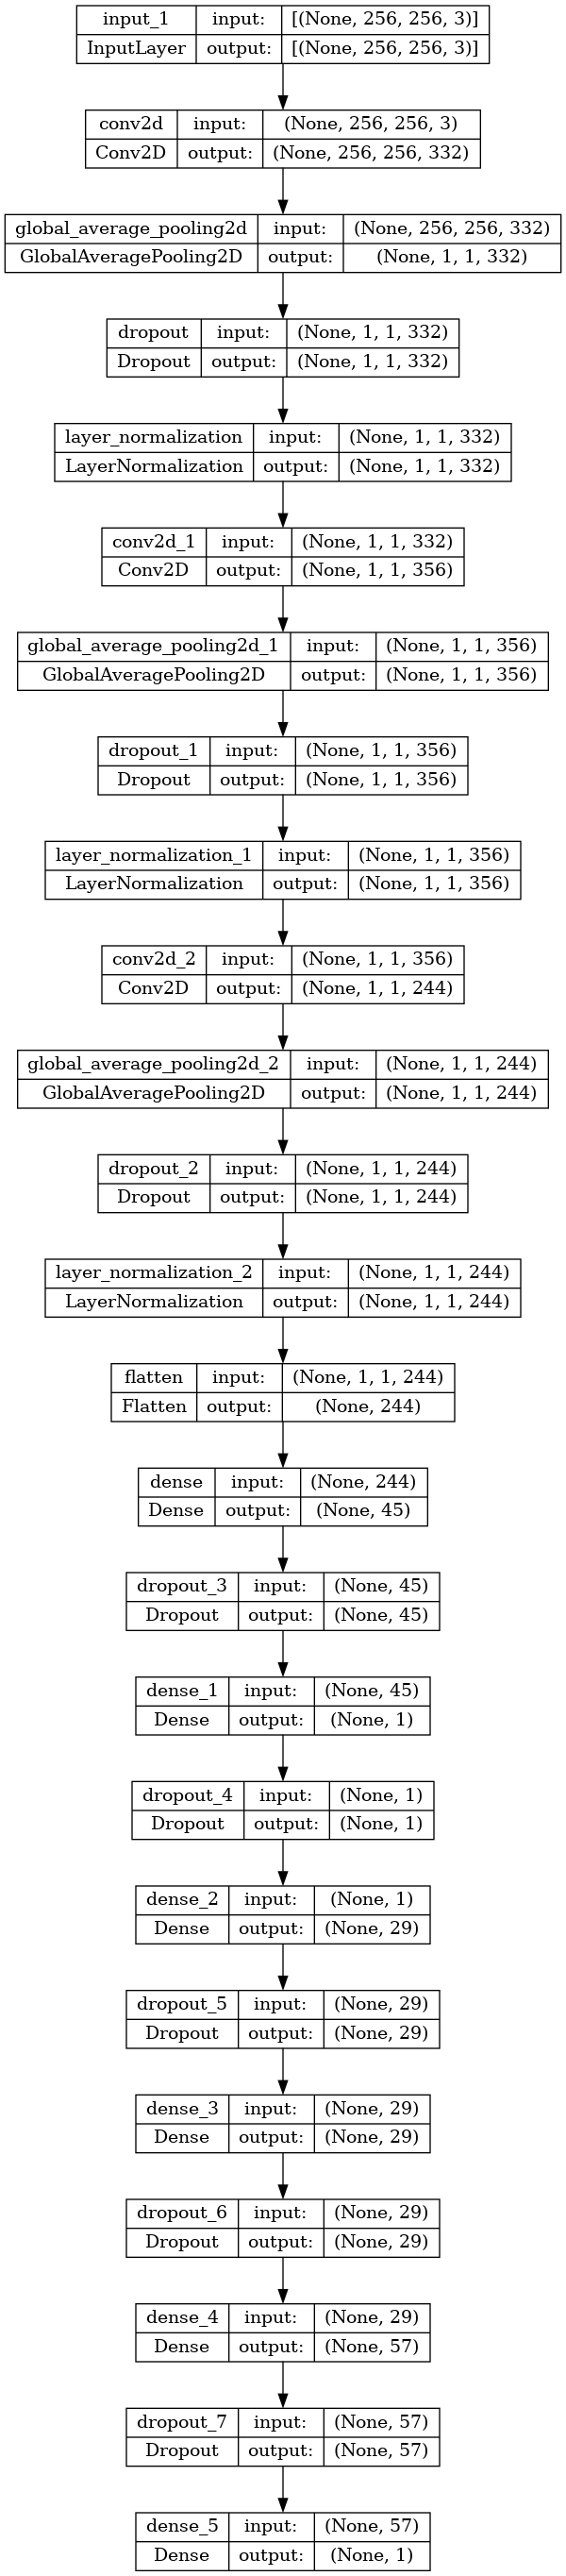

In [44]:
Model = tuner.get_best_models(num_models=1)[0]
tf.keras.utils.plot_model(
    model = Model,
    show_shapes=True,
)

In [40]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping( monitor = 'val_loss', patience=3),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5', save_freq="epoch",),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history = Model.fit(
    train_generator1, 
    epochs = 50, 
    validation_data=test_generator1, 
    batch_size=32, 
    validation_batch_size=32,
    use_multiprocessing=True, 
    callbacks=my_callbacks)

Epoch 1/50


2023-04-19 09:51:41.310361: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inUTKFaceModel1/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


625/625 [==============================] - 383s 610ms/step - loss: 430.6846 - mean_absolute_error: 15.9643 - val_loss: 386.9627 - val_mean_absolute_error: 15.0777
Epoch 2/50
625/625 [==============================] - 406s 649ms/step - loss: 428.0536 - mean_absolute_error: 15.9336 - val_loss: 387.7341 - val_mean_absolute_error: 14.9122
Epoch 3/50
625/625 [==============================] - 368s 588ms/step - loss: 426.1430 - mean_absolute_error: 15.8862 - val_loss: 386.9592 - val_mean_absolute_error: 15.0676
Epoch 4/50
625/625 [==============================] - 376s 601ms/step - loss: 427.6582 - mean_absolute_error: 15.9484 - val_loss: 387.1599 - val_mean_absolute_error: 14.9882
Epoch 5/50
625/625 [==============================] - 368s 589ms/step - loss: 426.6201 - mean_absolute_error: 15.8868 - val_loss: 387.8312 - val_mean_absolute_error: 14.9028
Epoch 6/50
625/625 [==============================] - 379s 606ms/step - loss: 425.9072 - mean_absolute_error: 15.8716 - val_loss: 387.8616 - 

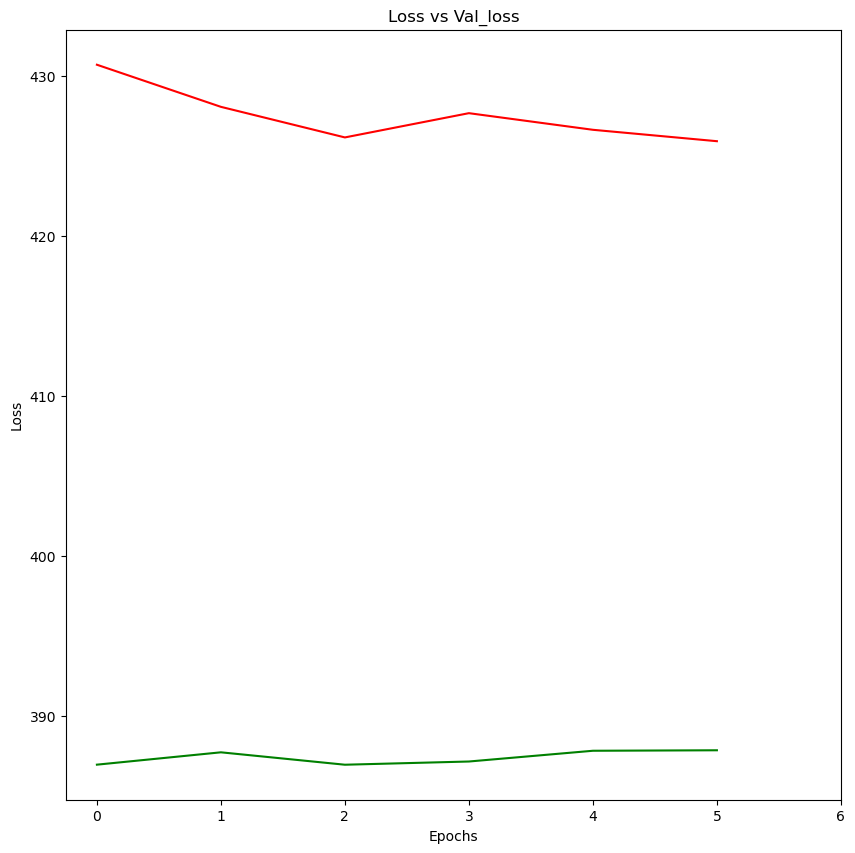

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title("Loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='green')
plt.xticks(range(0, len(history.history['loss'])+1, 1))
plt.show()

In [68]:
import cv2
img = cv2.imread(folder_path+'/'+'22_1_1_20170112233644761.jpg.chip.jpg')
img = np.expand_dims(img, axis=0)

In [69]:
Model.predict(img)

1/1 [==============================] - 0s 265ms/step


array([[33.02586]], dtype=float32)

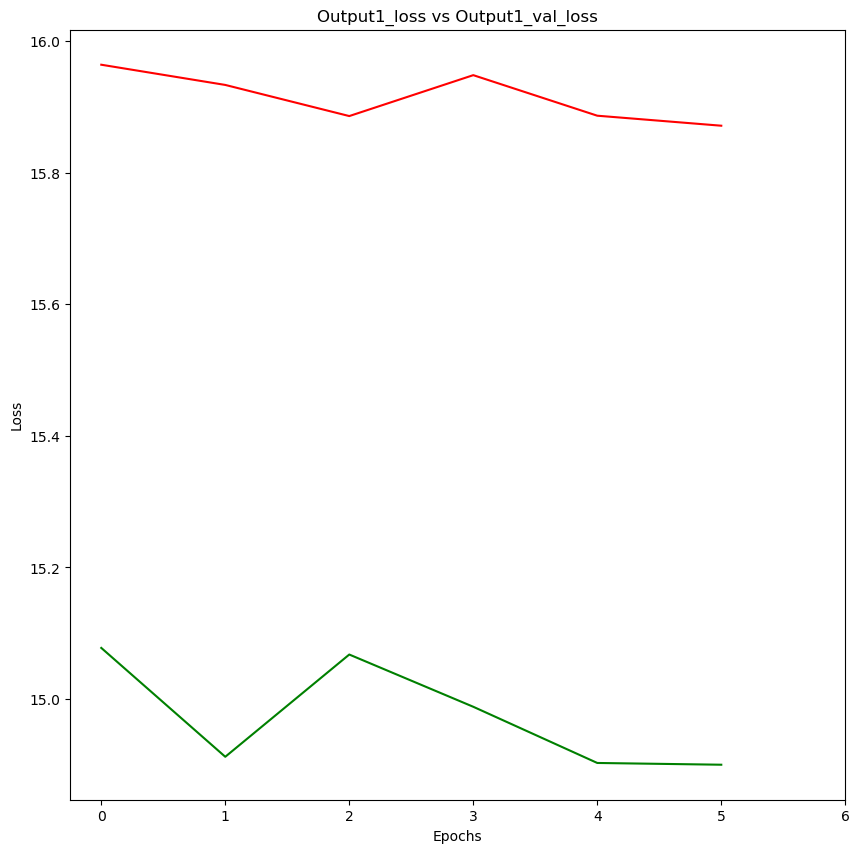

In [43]:
plt.figure(figsize=(10, 10))
plt.title("Output1_loss vs Output1_val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['mean_absolute_error'], color='red')
plt.plot(history.history['val_mean_absolute_error'], color='green')
plt.xticks(range(0, len(history.history['loss'])+1, 1))
plt.show()

In [80]:
train_generator2 = train_datagen.flow_from_dataframe(train_df2,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['gender'],
                                                    target_size=(256,256),
                                                    batch_size = 32,
                                                    class_mode='multi_output')

test_generator2 = test_datagen.flow_from_dataframe(test_df2,
                                                    directory=folder_path,
                                                    x_col='img',
                                                    y_col=['gender'],
                                                    batch_size = 32,
                                                    target_size=(256,256),
                                                  class_mode='multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


In [88]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_2_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True,
    project_name="UTKFACE",
)

In [89]:
tuner.search( train_generator2, epochs=5, validation_data=test_generator2)

Trial 3 Complete [00h 27m 58s]
val_loss: 0.5272384285926819

Best val_loss So Far: 0.5272384285926819
Total elapsed time: 01h 22m 11s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
6                 |3                 |layers
glorot_uniform    |glorot_uniform    |initializer
none              |maxpool           |maxpool
396               |20                |units1
0.4               |0.2               |rate1
236               |124               |units2
0.2               |0.5               |rate2
5                 |2                 |output2
17                |57                |d2units1
0.3               |0.4               |d2rate1
0.0015141         |0.002305          |lr2
adam              |rmsprop           |optimizer2
0                 |0                 |keep_dims1
1                 |0                 |keep_dims2
108               |428               |units3
0                 |1                 |keep_dims3
0.2               |0.5               |rate3
1

2023-04-19 12:23:14.305107: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inUTKFaceModel2/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


ResourceExhaustedError: Graph execution error:

Detected at node 'UTKFaceModel2/conv2d_1/Relu' defined at (most recent call last):
    File "/opt/conda/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/opt/conda/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.7/site-packages/traitlets/config/application.py", line 1041, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "/opt/conda/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_23/1331111635.py", line 1, in <module>
      tuner.search( train_generator2, epochs=5, validation_data=test_generator2)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/base_tuner.py", line 183, in search
      results = self.run_trial(trial, *fit_args, **fit_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/tuner.py", line 295, in run_trial
      obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/tuner.py", line 222, in _build_and_fit_model
      results = self.hypermodel.fit(hp, model, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras_tuner/engine/hypermodel.py", line 140, in fit
      return model.fit(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 1023, in train_step
      y_pred = self(x, training=True)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.7/site-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/opt/conda/lib/python3.7/site-packages/keras/activations.py", line 318, in relu
      x, alpha=alpha, max_value=max_value, threshold=threshold
    File "/opt/conda/lib/python3.7/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'UTKFaceModel2/conv2d_1/Relu'
OOM when allocating tensor with shape[32,256,256,236] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node UTKFaceModel2/conv2d_1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_233911]

In [ ]:
Model2 = tuner.get_best_models(num_models=1)[0]
tf.keras.utils.plot_model(
    model = Model2,
    show_shapes=True,
)

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Output2_loss vs Output2_val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history['dense_14_loss'], color='red')
plt.plot(history.history['val_dense_14_loss'], color='green')
plt.xticks(range(0, len(history.history['loss'])+1, 1))
plt.show()

In [ ]:
!mkdir -p saved_model
Model.save('saved_model/my_model')
Model.save('my_model.h5')